In [1]:
import matplotlib.pyplot as plt
import numpy as np	# array library
import scipy.optimize  # optimization package
import scipy.stats	# statistical packages
import time
# basic imports
from IPython import display


In [2]:
# This program demonstrates the use of scipy
# function optimizers for ML fit

# model of the curve
def model(p, x):
    # p -- parameters
    return (
        p[0] + p[1] * x + 5 * np.sin(x / p[2])
    )

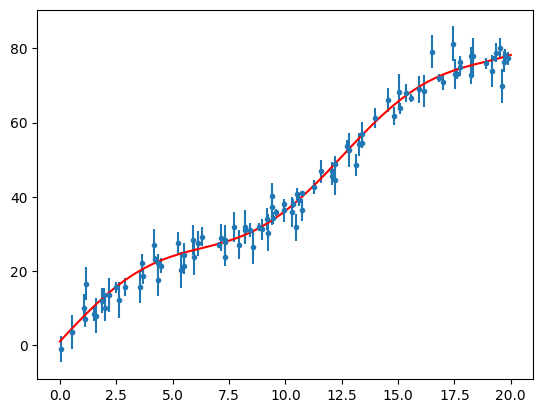

In [3]:
ptrue = [1, 4, 2] # adopted true values of parameters

def gendata():
    # generate the data
    # Our True model 1 + 4 * x + 5 * sin(x/2)

    npoints = 100
    minx, maxx = 0, 20
    xs = np.random.uniform(minx, maxx, npoints)
    # generates uniform distribution between minx, maxx with npoints
    ys = model(ptrue, xs)
    # error-free data

    errs = np.random.uniform(0.5, 5, npoints)
    # errors are uniformly distributed from 0.1 to 1

    ys = ys + np.random.normal(size=npoints) * errs
    # perturb the data by the errors

    plt.errorbar(xs, ys, errs, fmt='.')
    plt.plot(np.linspace(minx, maxx),
          model(ptrue, np.linspace(minx, maxx)),color='red')
    plt.draw()

    return xs,ys, errs

X, Y, E = gendata()

In [4]:
# log-likelihood function
def like1(p, xdat, ydat, errdat):
    # p are the model parameters

    ymod = model(p, xdat) # expected y-values

    logprob = scipy.stats.norm(ymod, errdat).logpdf(ydat)
    # probabilities of the data under Gaussian distribution
    # with logpdf we can avoid log(0) errors

    loglike = -logprob.sum()
    # minus log probabilities

    if True:
        doplot(p, xdat, ydat, errdat)
    # plotting if necessary

    print (p, loglike)

    return loglike

In [8]:
# The function that generates the data, then find the ML value using
# different optimizers
def run():

    xs, ys, errs = gendata()
    plt.clf();
    # method = 'Powell'
    #method = 'TNC'
    # Truncated Newton method
    #method = 'L-BFGS-B' # Broyden-Fletcher-Goldfarb-Shannon (gradient based)
    # can be more efficient in higher dimensional space
    method = 'Nelder-Mead' #Simplex method
    # Very good method for avoiding false minima

    p0 = [0.5, 4, 3]
    # p0 = [ 0.5, 0.5 ,0.5 ] # starting point that will not work
    # true value [ 2, 1, 4]
    # starting point
    maxiter = 1000 # maximum number of iteration (optional)
    res = scipy.optimize.minimize(like1, p0,
                    method=method,
                    args=(xs, ys, errs),
                    options={'maxiter': maxiter})
    # args carry anything we want to pass to our function (e.g. the data)

    print ('Best fit', res.x)
    print ('True parameters were', ptrue)
    print ('Best likelihood', res.fun)
    return res


# plotting function
def doplot(p, xdat, ydat, errdat):

    ymod = model(p, xdat)
    plottype = 1 #or 2
    # different convergence plots
    display.clear_output(wait=True)

    if plottype == 1:
        plt.clf()
        plt.errorbar(xdat, ydat, errdat, fmt='b.')
        plt.plot(np.linspace(0, 20), model(p, np.linspace(0, 20)), color='red')
        #plt.draw()
        #plt.pause(0.01)
        time.sleep(0.1)

    elif plottype == 2:
        p1, p2 = 1, 2
        if si.iter == 0:
            plt.clf()
            plt.plot(p[p1], p[p2], 'o')
        else:
            ax = plt.gca()
            ax.plot([si.calls[-1][p1], p[p1]], [si.calls[-1][p2], p[p2]],
                  'o')
            ax.plot([si.calls[-1][p1], p[p1]], [si.calls[-1][p2], p[p2]],
                  )
        si.iter += 1
        si.calls.append(p)
        #plt.draw()
        #plt.pause(0.001)
        time.sleep(0.01)
    display.display(plt.gcf())


class si:
    calls = []
    iter = 0

si.iter = 0
np.random.seed(1)

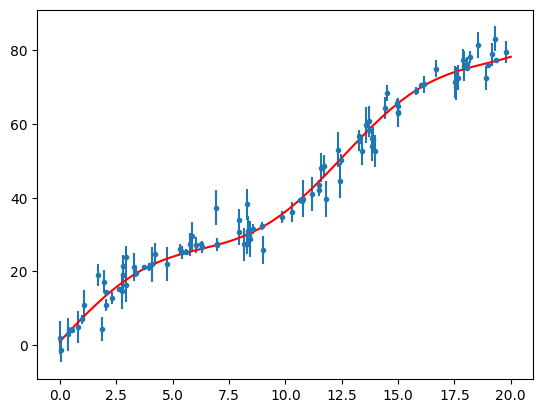

In [9]:
d=gendata()

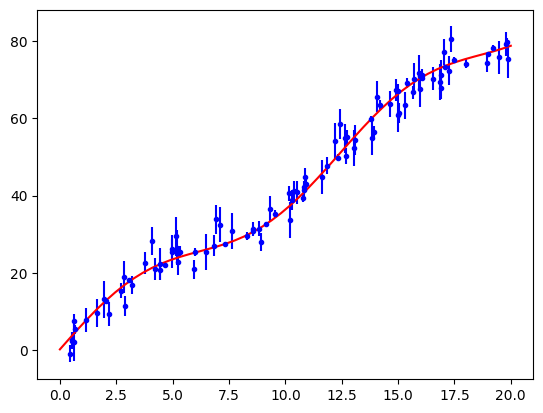

[0.13962224 4.09198659 1.97754723] 221.56727997640135
Best fit [0.13962224 4.09198659 1.97754723]
True parameters were [1, 4, 2]
Best likelihood 221.56727997640135


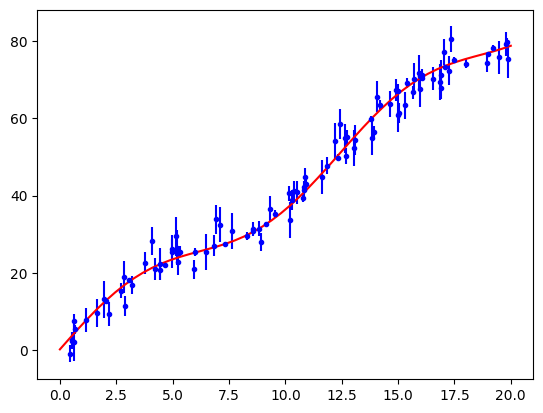

In [10]:
plt.figure()
ret=run()